In [2]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import models 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sean/anaconda3/envs/tf-gpu-c

In [3]:
df_pions = pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Djuna_Data_Generation_Notebook/noshift1.csv',header = None)

def data_normaliser(data):
    mean = np.mean(data, axis = 0)
    std = np.std(data,axis = 0)
    return (data -mean)/std 

In [4]:
train_x, train_y = df_pions.iloc[:-1000,:8], df_pions.iloc[:-1000,-1]
val_x, val_y = df_pions.iloc[-1000:,:8], df_pions.iloc[-1000:,-1]

In [24]:
class network():
    def __init__(self,train_x,train_y,val_x,val_y, layer_shapes, optimizer = 'Adam', ):
        self.train_x = train_x
        self.train_y = train_y
        self.val_x = val_x
        self.val_y = val_y
        self.optimizer = optimizer
        self.layer_shapes = layer_shapes
    def build(self,model_summary = False):
        #print(self.layer_shapes)
        model = models.Sequential()
        ##Layers 
        model.add(layers.Dense(self.layer_shapes[0],activation= 'relu',input_shape = (train_x.shape[1],)))
        for i in range(1,len(self.layer_shapes)):
            #print(i)
            model.add(layers.Dense(self.layer_shapes[i],activation = 'relu'))
        model.add(layers.Dense(1))
        model.compile(optimizer = self.optimizer,loss = 'mse', metrics = ['mean_absolute_percentage_error'])
        
        if model_summary:
            model.summary()
        
        return model

#### I fucking Hate How many hyperparameters there are 
class trained_network(network):
    def __init__(self,train_x,train_y,val_x,val_y, layer_shapes, optimizer = 'Adam', verbose = 0,epochs = 100):
        super().__init__(train_x,train_y,val_x,val_y, layer_shapes, optimizer)
        #print(layer_shapes)
        super().build()
        self.verbose  = verbose
        self.epochs = epochs 
        network = self.build()
        
        def fit(self,net):
            net_hist = net.fit( self.train_x, self.train_y, validation_data = (self.val_x,self.val_y), verbose  = self.verbose, epochs = self.epochs, use_multiprocessing = True)
            return net_hist
        self.history = fit(self,network).history 
        
class plotter():
    def __init__(self, history):
        self.history = history
    def basic(self):
        mape = self.history['mean_absolute_percentage_error']
        #percentageloss = 
        epochs = range(1,len(mape)+1) 
        plt.plot(epochs, mape)
    
### What do I want out of this??
#- Be able to vary shape of network easily 
#- Output Basic plot for fast comparison
#- Output History data for more in depth comparison 
#- I would quite like to automate my testing, so say I pass list of [[3,36],[2.36]...etc] it runs and stores some measure of how good these were, often interpreting the data requires a graph so maybe it needs to plot a bunch of subplots
#- Save Fig 
#- Diff Optimisers 



## Definin



In [16]:
opt = keras.optimizers.Adam(learning_rate= 0.005, beta_1 = 0.7, beta_2= 0.99)
inital_test = trained_network(train_x,train_y,val_x,val_y,[16,16], optimizer= opt, verbose= 0).history


1
1


3.029111


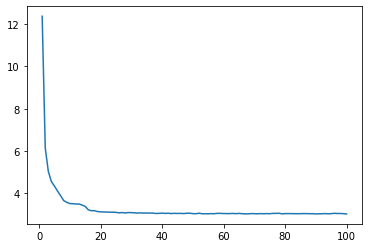

In [15]:
plt.plot(range(1,101),inital_test['mean_absolute_percentage_error'])
print(np.min(inital_test['mean_absolute_percentage_error']))

Initial Work - What metric am i going to define a minimum by
- Ideally I dont want to look at each graph- Thus I think some kind of exponential smoothing should be added, 
this weights each point with history 
-Possible Idea --- Find a minimum, If the mean of the points after is greater than the standard deviation of 20 nearest neighbours, then this is a U shape tp - find some way of assesing the error there
                --- if you find a minimum and point plus std is less than future points then you can take the mean of future points and calculate the eror, 
                --- if the minima is the final point take that and maybe label 

Testing convergance with sample size. 


In [25]:
num_points = 50
number_of_training_points = np.geomspace(10,99000,num = num_points,dtype= int)
#print(number_of_training_points)
min_mae = []
is_last_epoc = []

for i in range(num_points): 
    print('Loop Number #',i)
    for i in range(10):
    history  =  trained_network(train_x[:number_of_training_points[i]],train_y[:number_of_training_points[i]],val_x,val_y,[16,16], optimizer= opt, verbose= 0).history
    mae = history['mean_absolute_percentage_error']
    min_mae.append(np.min(mae))
    
    if np.argmin(mae) == len(mae)-1:
        is_last_epoc.append(1)
    else: 
        is_last_epoc.append(0)
    

Loop Number # 0
Loop Number # 1
Loop Number # 2
Loop Number # 3
Loop Number # 4
Loop Number # 5
Loop Number # 6
Loop Number # 7
Loop Number # 8
Loop Number # 9
Loop Number # 10
Loop Number # 11
Loop Number # 12
Loop Number # 13
Loop Number # 14
Loop Number # 15
Loop Number # 16
Loop Number # 17
Loop Number # 18
Loop Number # 19
Loop Number # 20
Loop Number # 21
Loop Number # 22
Loop Number # 23
Loop Number # 24
Loop Number # 25
Loop Number # 26
Loop Number # 27
Loop Number # 28
Loop Number # 29
Loop Number # 30
Loop Number # 31
Loop Number # 32
Loop Number # 33
Loop Number # 34
Loop Number # 35
Loop Number # 36
Loop Number # 37
Loop Number # 38
Loop Number # 39
Loop Number # 40
Loop Number # 41
Loop Number # 42
Loop Number # 43
Loop Number # 44
Loop Number # 45
Loop Number # 46
Loop Number # 47
Loop Number # 48
Loop Number # 49


([<matplotlib.axis.XTick at 0x7f4f7d0aa410>,
 [Text(2.302585092994046, 0, '10'),
  Text(3.9889840465642745, 0, '54'),
  Text(5.869296913133774, 0, '354'),
  Text(7.7475968386928855, 0, '2316'),
  Text(9.625227618663251, 0, '15142'),
  Text(11.502875129116727, 0, '99000')])

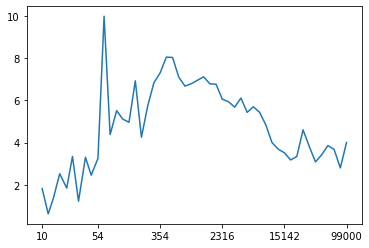

In [33]:
plt.plot(np.log(number_of_training_points),min_mae)
plt.xticks(np.log(number_of_training_points)[[0,9,19,29,39,49]],labels= number_of_training_points[[0,9,19,29,39,49]])